### 사이킷런을 이용하여 붓꽃(Iris) 데이터 품종 예측하기

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [18]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩 -> Bunch 객체 반환
iris = load_iris()

# iris 객체의 구조
#{
#  'data': ... ,            # 피처 값 (X)
#  'target': ... ,          # 레이블 값 (y)
#  'feature_names': ... ,   # 피처 이름
#  'target_names': ... ,    # 레이블 이름
#  'DESCR': ... ,           # 데이터 설명
#  ...
# }

In [6]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [19]:
# iris.data는 Iris 데이터 세트에서 피처(x)만으로 된 데이터 
iris_data = iris.data
# iris.target은 붓꽃 데이터 세트에서 레이블(y) 데이터 
iris_label = iris.target

print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


In [25]:
# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환하여 관찰하기
# 데이터프레임을 생성할 때는 데이터 전체 + 열 이름만 주면 됨
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris_label

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


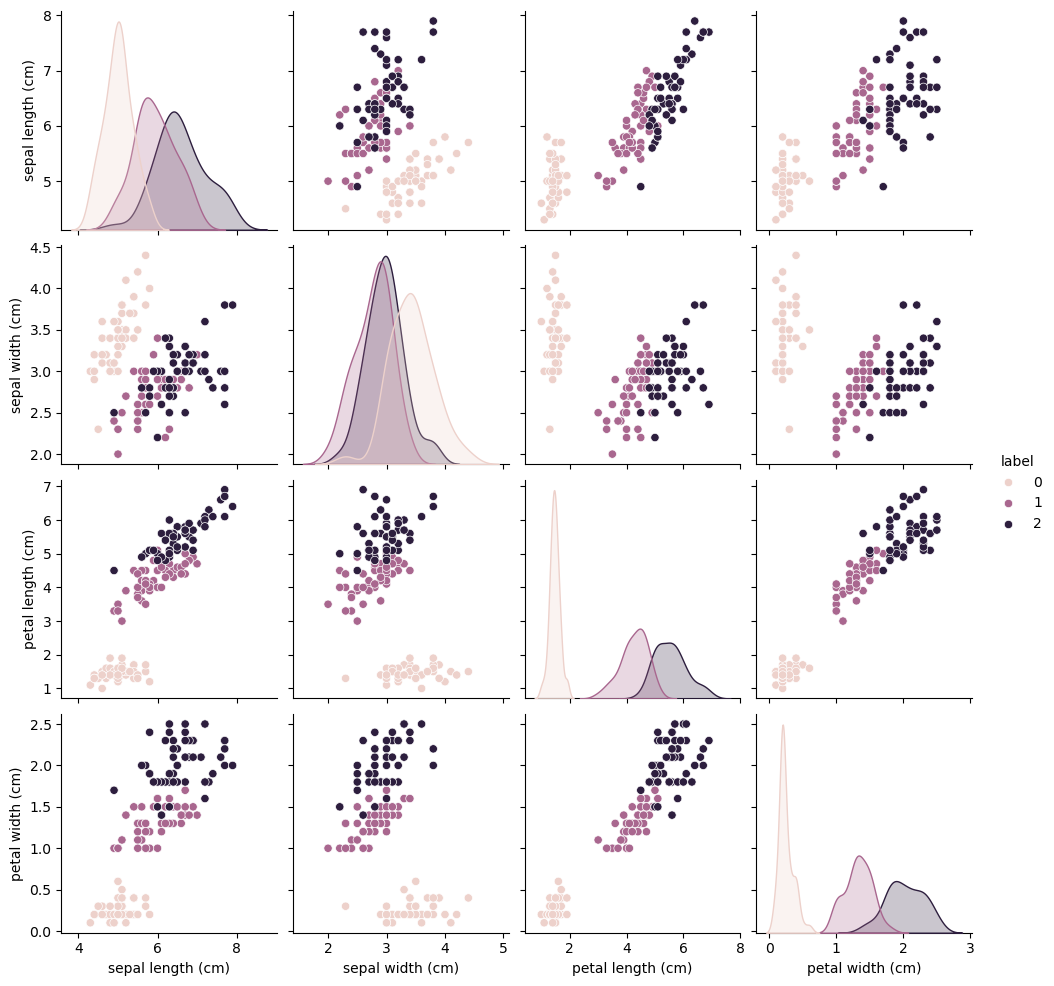

In [48]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(iris_df, hue='label')
plt.show()

In [27]:
# 속성(features)과 타겟(target/label) 분리
# 속성(feature): 모델이 학습할 입력 데이터, 타겟(target/label): 모델이 예측하고자 하는 정답값

X = iris_df.drop('label', axis=1) # 입력 데이터
y = iris_df['label'] # 정답값


In [43]:
# 학습용 데이터와 테스트용 데이터로 분리하기
# 전체 데이터 중 테스트 데이터가 20%, 학습 데이터가 80%로 데이터를 분리, random_state=42

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [44]:
pd.Series(y_test).value_counts()

label
0    10
2    10
1    10
Name: count, dtype: int64

In [45]:
# 머신러닝 분류 알고리즘의 하나인 의사 결정 트리를 이용해 학습과 예측 수행하기
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행 (학습 데이터를 사용하여 fit 하기!!!)
dt_clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,11
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [46]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행. 
# 반드시 테스트 데이터로 예측하기
pred = dt_clf.predict(X_test)

print('예측 label: ', pred)
print('실제 label: ', y_test.values)

예측 label:  [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 2 1 0 2 0]
실제 label:  [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]


In [50]:
# 성능 평가하기
# 모델의 성능을 평가하는 방법은 여러가지가 있으나 여기서는 정확도를 측정해보자
# 정확도는 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지를 평가하는 지표

from sklearn.metrics import accuracy_score

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9667


In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
# 교차검증 

In [ ]:
from sklearn.datasets import load_iris 
iris = load_iris() 
df_iris = pd.DataFrame(iris.data,
             columns = iris.feature_names)
df_iris["label"] = iris.target
df_iris.head(3)

In [ ]:
X = df_iris.drop('label', axis=1)
y = df_iris['label']

In [ ]:
from sklearn.model_selection import train_test_split

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# 훈련데이터로 교차검증 

from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = DecisionTreeClassifier()

cv_scores_accuracy = cross_val_score(model, X = X_train, y = y_train, scoring='accuracy', cv=skf)
cv_scores_f1= cross_val_score(model, X = X_train, y = y_train, scoring='f1_macro', cv=skf)

print('accuracy : ', cv_scores_accuracy, cv_scores_accuracy.mean())
print('f1 : ', cv_scores_f1, cv_scores_f1.mean())

# 훈련 데이터 전체로 재학습 
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

In [ ]:
# 테스트데이터로 최종평가 
from sklearn.metrics import classification_report

In [ ]:
# GridSearchCV 

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

parameters = {'max_depth':[3,4,5],
              'min_samples_split':[2,4]}

gscv = GridSearchCV(model, param_grid=parameters, cv=skf, refit=True)

gscv.fit(X_train, y_train)

In [ ]:
# GridSearchCV 결과확인 

In [ ]:
# 최종 테스트